# 1. はじめに

このノートブックは、Google Colab環境での実行を想定しています。  
予め左のメニューから、「ファイル」→「ドライブをマウント」でGoogle Driveへ接続可能な状態にしておいてください。  
また、訓練の実行にはGPUを使用するため、上のメニューの「ランタイム」→「ランタイムのタイプを変更」からGPUを選択してください。

# 2. データセットのダウンロード

以下のセルでデータセットのダウンロードをします。  
データセットは、顔画像とマスクを付与した正解ラベル画像のペアが1000枚含まれています。

In [2]:
# データセットのダウンロード
import urllib.request

url = 'https://www.dropbox.com/s/6j2qlb8vlf0i4rn/dataset_masks.zip?dl=1'
file_name = '/content/dataset_masks.zip'
urllib.request.urlretrieve(url, file_name)

!unzip -q /content/dataset_masks.zip -d /content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix/datasets

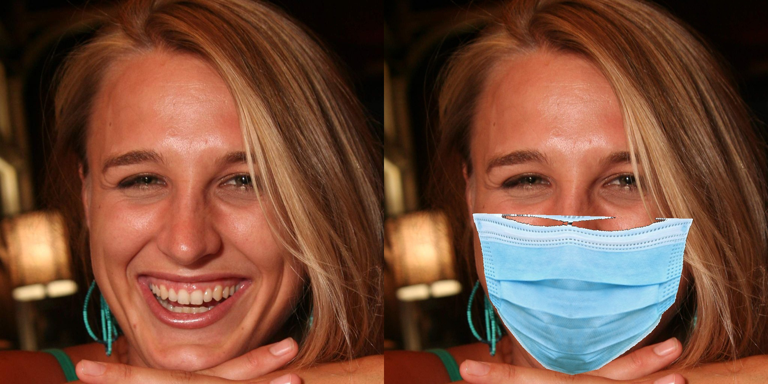

In [3]:
# データセットの画像表示
from PIL import Image

img = Image.open('/content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix/datasets/masks/train/00001.jpg')
img = img.resize((768, 384))
img

左側がpix2pixの入力画像、右側がマスクを付与した正解ラベル画像を表しています。

# 3. モデルの訓練

## 3-1. 必要なライブラリのインストール

In [ ]:
# カレントディレクトリの移動
%cd /content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix

Colabではセッションが切れる度に初期状態へリセットされるため、セッション立ち上げ毎に必要なライブラリをインストールしてください。

In [ ]:
# 必要なライブラリのインストール
!pip install -r requirements.txt

visdomは、モデルの生成器や識別器のLoss等、モデルの訓練過程をリアルタイムで確認できるライブラリです。  
以下のセルを実行して表示されるURLのページ上で確認できます。

In [ ]:
# visdomを有効にする
!npm install -g localtunnel
!python3 -m pip install visdom

!python3 -m visdom.server -port 8097 >> visdomlog.txt 2>&1 &
!lt --port 8097 >> url.txt 2>&1 &

import time
time.sleep(5)
!cat url.txt

## 3-2. 訓練の実行

In [ ]:
# カレントディレクトリの移動
%cd /content/drive/MyDrive/face2mask-2/pytorch-CycleGAN-and-pix2pix

以下のセルで訓練を実行します。（ランタイムはGPUを使用）  
`train.py`の各オプションは以下の通り。

- --dataroot　使用するデータセットの場所指定
- --name　作成するモデルの名前
- --model　使用するモデルの指定
- --batch_size　バッチサイズ

その他のオプションは`options`を参照してください。

In [ ]:
!python train.py --dataroot ./datasets/masks --name face2mask --model pix2pix --batch_size 4

訓練結果やモデルは`checkpoints`に保存されます。